
# <center> Zajęcia nr 5 </center>

## Plan
* jeszcze trochę o numpy (dokończenie poprzedniego notatnika)
* rysowanie prostych wykresów
* numeryczne przybliżanie pochodnych
* całkowanie numeryczne
* numeryczne rozwiązywanie równań

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

## <center> Dokończenie poprzedniego notatnika </center>

## Operacje na tablicach

**Najważniejsze do zapamiętania**: operacje wykonywane są element po elemencie

Kilka nieoczywistych funkcji:

* ```np.remainder``` - reszta z dzielenia
* ```np.floor``` - część całkowita
* ```np.round``` - zaokrąglanie
* ```np.sort``` - sortowanie
* ```np.abs``` - wartośc bezwzględna


* ```np.where``` - wybiera elementy z jednej lub drugiej tablicy, zależnie od (nie)spełnienia warunku
* ```np.select``` - rozbudowane ```where```
* ```np.nonzero``` - zwraca indeksy niezerowych elementów w tablicy

**Uwaga** Żeby stworzyć własne funkcje działające po elementach tablicy trzeba je utworzyć za pomocą ```np.vectorize```


## Broadcasting (!)
Macierze zmieniają swoje wymiary by dopasować się do innych macierzy w danej operacji.

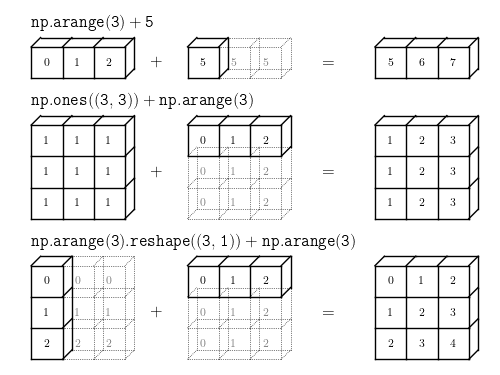

## Funkcje agregujące
* ```np.mean``` - średnia
* ```np.std``` - odchylenie standardowe
* ```np.var``` - wariancja $var=std^2$
* ```np.median```
* ```np.sum```
* ```np.prod```
* ```np.cumsum``` - skomulowana suma
* ```np.cumprod```
* ```np.min, np.max```
* ```np.argmin, np.argmax```
* ```np.all, np.any``` - sprawdza czy wszystkie lub którykolwiek są True (np. różne od zera)

**Uwaga** dla wielowymiarowych tablic możemy określić wzdłuż której z osi chcemy agregować

### Zadanie 9
Przypuśćmy, że masz 3 chomiki i każdy z nich może jeść z 10 różnych pojemników. Zliczasz ile razy każdy z nich jadł z danego pojemnika. Dla każdego chomika oblicz prawdopodobieństwo z jakim je on z danego pojemnika.



In [18]:
dane=np.random.randint(0,7,size=(3,10))

array([[2, 0, 6, 2, 4, 2, 0, 5, 0, 0],
       [2, 6, 0, 2, 6, 2, 4, 5, 5, 3],
       [1, 0, 0, 1, 4, 0, 6, 6, 6, 0]])

### Zadanie 10

Wygeneruj losową tablicę L(100x10) liczb całkowitych z przedziału [0,10] generatorem=12345 (```np.random.seed(12345)``` przed użyciem ```np.random.random_integers```. Sprawdź:
* ile jest w niej liczb większych od 3
* jaka jest średnia w każdej kolumnie
* określ w których wierszach co najmniej połowa liczb jest $\geq 5$
* wypisz kolejno (wierszami) wsyzsktie elementy tablicy z przedziału [2,5]. 
* stwórz nową talibcę, zerując w L wszysktie elementy spoza przedziału [2,5].
* znajdź wiersze, które nie zawierają żadnego zera

## <center> Nowy notatnik </center>

## Proste wykresy

### Zadanie 1
Stwórz wykres funkcji $e^x$ na przedziale $(-10,10)$ korzystając z 50 obliczonych punktów.

---
### Zadanie 2
Narysuj wykres i znajdź w przybliżeniu najmniejszą wartość funkcji $f(x)=\sin(x)\cdot e^x$ na przedziale $[0,6]$. W jakim (mniej więcej) punkcie to minimum jest przyjmowane?

---

## Dlaczego warto korzystać z numpy?
Zbadajmy jak szybkie błądzenie losowe możemy uzyskać klasycznie (z użyciem list), a jakie z użyciem numpy

In [28]:
def random_walk(n):
    position = 0
    walk = [position]
    for i in range(n):
        position += np.random.choice([-1, 1])
        walk.append(position)
    return walk

In [30]:
def random_walk_fastest(n=1000):
    steps = np.random.choice([-1,+1], n)
    return np.cumsum(steps)

### Zadanie dla osób chętnych
Z wykorzystaniem tablic numpy zaimplementuj "grę w życie" :
1) każde pole (komórka) planszy $n\times m$ może być komórką martwą (0) lub żywą (1)
2) Komórka, która ma 2 lub 3 żywych sąsiadów przetrwa do kolejnej generacji. Pozostałe umierają (z samotności lub przeludnienia)
3) Martwa komórka ożyje gdy ma dokładnie 3 sąsiadów.

Wylosuj początkowe rozstawienie żywych komórek i zasymuluj ewolucję.

## Numeryczne pochodne

#### Pierwsza pochodna
$\frac{f(x+h)-f(x)}{h} \approx f'(x)$

**Twierdzenie:** Jeśli $f$ jest funkcją dwukrotnie różniczkowalną (z ciagłą drugą pochodną) to błąd powyższego oszacowania jest nie większy niż $\frac{hM}{2}$, gdzie $M=\sup_{y\in [x,x+h]} |f''(y)|$

#### Druga pochodna

$f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}-\frac{h^2}{6}f^{(4)}(\xi)$, gdzie $\xi\in [x-h,x+h]$.

---
### Zadanie 3A
Zaimplementuj funkcję ```dfdx(f,x,h)``` obliczającą numeryczną pochodną funkcji $f$ w punktach `x` ze skokiem `h` domyślnie ustawionym na $0.0001$. Np. ```dfdx(np.sin,x,h=0.001)```

---

---
### Zadanie 3B
Zaimplementuj funkcję ```dydx(y,x)``` obliczającą numeryczną pochodną funkcji o wartościach `y` w punktach `x`. Np. ```dydx(np.sin(x),x)```

---

---
### Zadanie 4
* Korzystając z wyżej zdefiniowanej funkcji (z 2A lub 2B) oblicz pochodną funkcji $y=e^{-x/10}\sin(x)$ rozważając $10000$ punktów $x$ w przedziale $[0,10]$.
* Zlokalizuj (oczywiście w przybliżeniu) ekstrema badanej funkcji.
* Narysuj na jednym wykresie funkcję i jej pochodną; zaznacz ekstrema.
---

---
---
---


Funkcje do liczenia numerycznej pochodnej są oczywiście zaimplementowane:
* `np.gradient()` - oblicza pochodną centralną
* cały pakiet `numdifftools` z funkcjami:
    - `Derivative`
    - `Gradient`
    - `Hessian`
    - `Jacobian`
* `scipy.misc.derivative` - oblicza pochodną dowolnego rzędu w punkcie

## Całkowanie numeryczne

$$\int_a^b f(x)\,dx=\lim_{n\to\infty} \sum_{i=1}^n f(x_i^*) (x_i-x_{i-1})$$
gdzie $x_i^*\in[x_{i-1},x_i]$, oraz $a=x_0<\ldots<x_n=b$

**Twierdzenie** 
$$ \left| \int_a^b f(x)\,dx - L_N(f)\right|\leq\frac{(b-a)^2}{2N}M, $$
gdzie $L_N(f)$ jest lewą sumą Riemanna, a $M=\sup_{y\in[a,b]} |f'(y)|$.

Całkowanie też jest oczywiście zaimplementowane w `numpy` i innych bibliotekach.
* `np.trapz` - całkowanie metodą trapezów
* `np.cumsum` - zwraca "funkcję" pierwotną
* `scipy.integrate.quad` - dokładne całkowanie w 1d
* `scipy.integrate.nquad` - całki wielokrotne
* `scipy.integrate.solve_ivp` - całkowanie równań różniczkowych

Przykład: $f(x)=|\sin x|$

### Zadanie 5 
Znajdź numerycznie funkcję pierwotną funkcji $f(x)=|\sin (x)|$ z powyższego przykładu. Narysuj wykres. Obliczając numeryczną pochodną zweryfikuj wynik.

## Numeryczne rozwiązywanie równań


### Zadanie 6
Korzystając z funkcji ```scipy.optimize.fsolve``` znajdź rozwiązanie równania $\cos x - x=0$ w pobliżu $x=-2$. Sprawdź, że jest to rozwiązanie.

### Zadanie 7
Zaimplementuj rekurencyjną metodę bisekcji dla funkcji $f$ na przedziale $[a,b]$ z tolerancją err: ```bisekcja(f,a,b,err)```

# Zadanie domowe

* Napisz metodę `calka(f,a,b,N)`, która oblicza **pole powierzchni ograniczonej osią OX i wykresem funkcji** na danym przedziale za pomocą lewych sum Riemanna (przybliżeń prostokątami).
* Sprawdź działanie swojej metody na wybranej przez siebie funkcji **porównując** z wynikiem całkownia symbolicznego, a także całkowania z użyciem `scipy.integrate.quad`
* Dobierz takie parametry do swojej funkcji, aby błąd całkowania był mniejszy niż $10^{-5}$. Możesz korzystać z przybliżenia pochodnej.
